In [2]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from scipy.stats import t, pearsonr
import seaborn as sns
from statistics import mean, stdev

In [140]:
#import excel file containing data summary
wtpdata = pd.read_excel(r'wtp_taskdata.xlsx')
print(wtpdata)


                  participant  avg_spent_social  avg_spent_nonsocial  \
0    5ea3310bf9c4f828f0c909c5          0.030244             0.029000   
1    5eeaff28cf5da71d691ef212          0.026000             0.028780   
2    5ee1bc2e2be5f61f0eaf1713          0.027308             0.028000   
3   ﻿5cfecc1e96681500168a1799          0.038333             0.037037   
4    5ff362e8c9707d8ff6020080          0.028800             0.026800   
5   ﻿5e76742575ad9c0506e721bb          0.031667             0.029091   
6    ﻿5ef76ff7d195c248bfe2511          0.031795             0.030833   
7   ﻿5f7e4fbc36d39211c80599fe          0.035263             0.027813   
8   ﻿5f8dd51f6d2378145bf99cdc          0.035000             0.029063   
9   ﻿5f12b3a2791d172281e7d6a9          0.028621             0.024545   
10  ﻿5ff0a56b116bbf440e520992          0.037692             0.029600   
11  ﻿566c9284d408ea000519c6d7          0.018889             0.017500   
12  ﻿5f2dc46d6fa1250ee8a1a15d          0.035333             0.03

In [5]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print(social_M)

0.029382767671262928


In [6]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences

nonsocial_M = mean(nonsocialavg)
print(nonsocial_M)


0.02714235592545063


In [7]:
#sample size
n = len(wtpdata)
print(n)

49


In [8]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)


0.0007521729574217004 0.1097801755448026
0.0032474995595130206


In [9]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0004639285085018601


In [10]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

4.829217659089635


In [11]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

48


In [12]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=4.829, df=48, cv=1.677, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


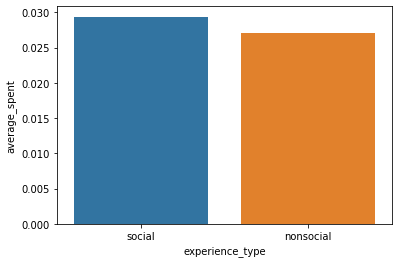

In [13]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [14]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.4177163265784589


In [15]:
#socialavg= wtpdata.avg_spent_social
#nonsocialavg= wtpdata.avg_spent_nonsocial
prop_social = wtpdata['%_social']
mspss = wtpdata.mspss_score #perceived social support
iri_pt = wtpdata.iri_pt #perspective taking subscale
iri_fs = wtpdata.iri_fs #fantasy subscale
iri_ec = wtpdata.iri_ec #emapthetic concern
iri_pd = wtpdata.iri_pd #personal distress
iri_sum = wtpdata.iri_sum #total iri score
rse = wtpdata.RSE_SCORE
aq = wtpdata.AQ



In [16]:
print(social_M)
print(nonsocial_M)
print(mean(iri_sum))
print(mean(rse)) 
print(mean(aq))

0.029382767671262928
0.02714235592545063
80.16326530612245
23
20


In [17]:
##### amount spent on social experiences // self report  ######

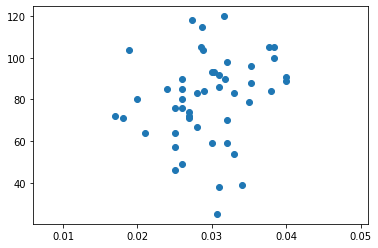

[[3.04732975e-05 2.27353257e-02]
 [2.27353257e-02 4.41097789e+02]]
Pearsons correlation: 0.196
p value: 0.1769
Accept null hypothesis that the means are equal.


In [18]:
#amount spent on social / interpersonal reactivity index

pyplot.scatter(socialavg, iri_sum) 
pyplot.show()
covariance = cov(socialavg, iri_sum)
print(covariance)
corr, _ = pearsonr(socialavg, iri_sum)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_sum)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


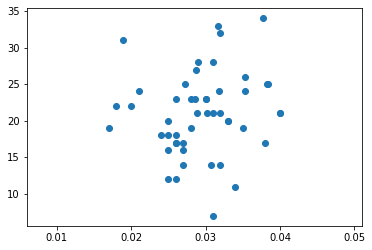

[[3.04732975e-05 4.29899002e-03]
 [4.29899002e-03 3.23086735e+01]]
Pearsons correlation: 0.137
p value: 0.3479
Accept null hypothesis that the means are equal.


In [19]:
pyplot.scatter(socialavg, iri_pt) 
pyplot.show()
covariance = cov(socialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


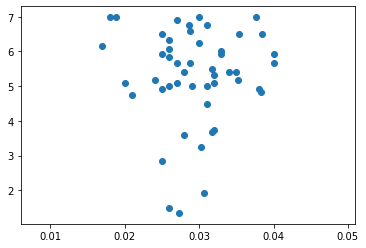

[[3.04732975e-05 5.05032377e-05]
 [5.05032377e-05 1.91462246e+00]]
Pearsons correlation: 0.007
p value: 0.9640
Accept null hypothesis that the means are equal.


In [20]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

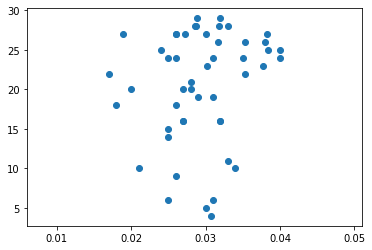

[[3.04732975e-05 7.03273547e-03]
 [7.03273547e-03 5.00051020e+01]]
Pearsons correlation: 0.180
p value: 0.2154
Accept null hypothesis that the means are equal.


In [21]:
pyplot.scatter(socialavg, iri_fs) 
pyplot.show()
covariance = cov(socialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(socialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

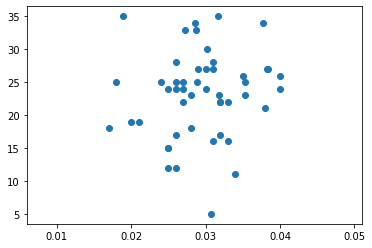

[[3.04732975e-05 4.35592758e-03]
 [4.35592758e-03 4.27644558e+01]]
Pearsons correlation: 0.121
p value: 0.4089
Accept null hypothesis that the means are equal.


In [22]:
pyplot.scatter(socialavg, iri_ec) 
pyplot.show()
covariance = cov(socialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(socialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_ec)
print('p value: %.4f' % p)


alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

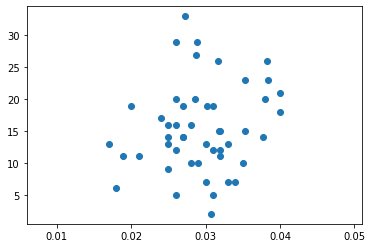

[[3.04732975e-05 6.87432625e-03]
 [6.87432625e-03 4.70833333e+01]]
Pearsons correlation: 0.181
p value: 0.2120
Accept null hypothesis that the means are equal.


In [23]:
pyplot.scatter(socialavg, iri_pd) 
pyplot.show()
covariance = cov(socialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

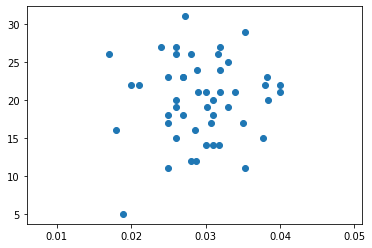

[[3.04732975e-05 2.12172558e-03]
 [2.12172558e-03 2.82083333e+01]]
Pearsons correlation: 0.072
p value: 0.6212
Accept null hypothesis that the means are equal.


In [24]:
## AQ

# social // aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

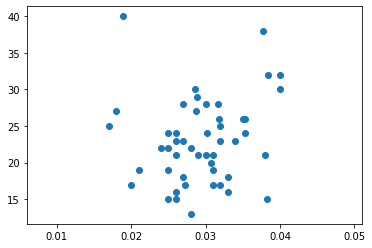

[[3.04732975e-05 5.03194452e-03]
 [5.03194452e-03 3.37500000e+01]]
Pearsons correlation: 0.157
p value: 0.2816
Accept null hypothesis that the means are equal.


In [25]:
# social // rse
pyplot.scatter(socialavg, rse)
pyplot.show()
covariance = cov(socialavg, rse)
print(covariance)
corr, _ = pearsonr(socialavg, rse)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, rse)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [26]:
##### prop of chosen social // self report #####

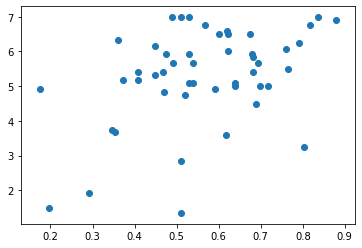

[[0.02579119 0.09125633]
 [0.09125633 1.91462246]]
Pearsons correlation: 0.411
p value: 0.0034
Reject the null hypothesis that the means are equal.


In [27]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

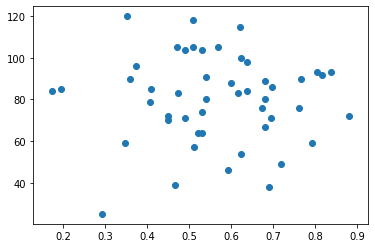

[[ 2.57911879e-02 -4.90294622e-02]
 [-4.90294622e-02  4.41097789e+02]]
Pearsons correlation: -0.015
p value: 0.9210
Accept null hypothesis that the means are equal.


In [28]:
#prop of chosen social // IRI
pyplot.scatter(prop_social, iri_sum)
pyplot.show()
covariance = cov(prop_social, iri_sum)
print(covariance)
corr, _ = pearsonr(prop_social, iri_sum)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_sum)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

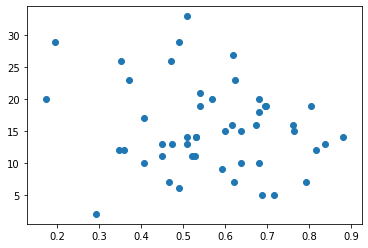

[[ 2.57911879e-02 -1.96416321e-01]
 [-1.96416321e-01  4.70833333e+01]]
Pearsons correlation: -0.178
p value: 0.2205
Accept null hypothesis that the means are equal.


In [29]:
#prop of chosen social // iri perspective taking
pyplot.scatter(prop_social, iri_pd)
pyplot.show()
covariance = cov(prop_social, iri_pd)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pd)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

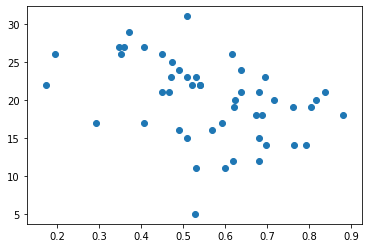

[[ 2.57911879e-02 -3.37629371e-01]
 [-3.37629371e-01  2.82083333e+01]]
Pearsons correlation: -0.396
p value: 0.0049
Reject the null hypothesis that the means are equal.


In [30]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

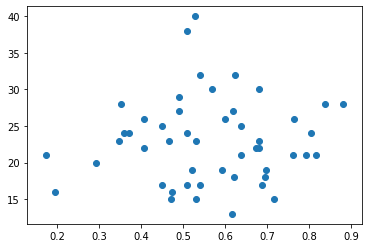

[[2.57911879e-02 5.33489313e-02]
 [5.33489313e-02 3.37500000e+01]]
Pearsons correlation: 0.057
p value: 0.6963
Accept null hypothesis that the means are equal.


In [31]:
# prop social // self esteem
pyplot.scatter(prop_social, rse)
pyplot.show()
covariance = cov(prop_social, rse)
print(covariance)
corr, _ = pearsonr(prop_social, rse)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, rse)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [32]:
##### avg spent on nonsocial // self report #####

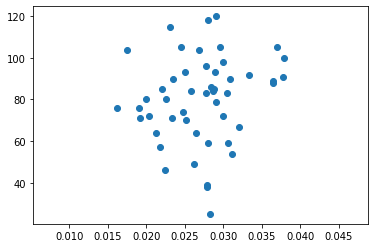

[[2.70604652e-05 1.84063664e-02]
 [1.84063664e-02 4.41097789e+02]]
Pearsons correlation: 0.168
p value: 0.2472
Accept null hypothesis that the means are equal.


In [33]:
# nonsocial // iri 
pyplot.scatter(nonsocialavg, iri_sum)
pyplot.show()
covariance = cov(nonsocialavg, iri_sum)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_sum)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_sum)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

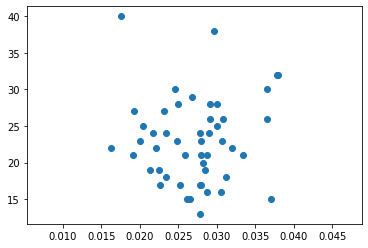

[[2.70604652e-05 1.54607311e-03]
 [1.54607311e-03 3.37500000e+01]]
Pearsons correlation: 0.051
p value: 0.7270
Accept null hypothesis that the means are equal.


In [34]:
# nonsocial // self esteem
pyplot.scatter(nonsocialavg, rse)
pyplot.show()
covariance = cov(nonsocialavg, rse)
print(covariance)
corr, _ = pearsonr(nonsocialavg, rse)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, rse)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

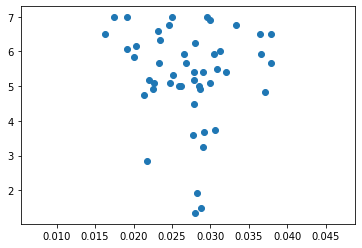

[[ 2.70604652e-05 -6.42341052e-04]
 [-6.42341052e-04  1.91462246e+00]]
Pearsons correlation: -0.089
p value: 0.5420
Accept null hypothesis that the means are equal.


In [35]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


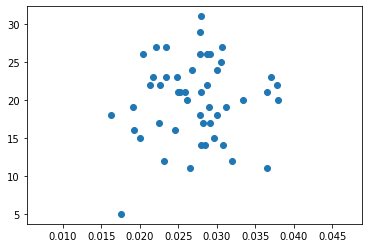

[[2.70604652e-05 2.17727480e-03]
 [2.17727480e-03 2.82083333e+01]]
Pearsons correlation: 0.079
p value: 0.5904
Accept null hypothesis that the means are equal.


In [36]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    


In [137]:
#hey

import pandas as pd

cormat = wtpdata.corr()
print(cormat)

                     avg_spent_social  avg_spent_nonsocial  %_social  \
avg_spent_social             1.000000             0.818135 -0.050110   
avg_spent_nonsocial          0.818135             1.000000  0.033160   
%_social                    -0.050110             0.033160  1.000000   
mspss_score                  0.006612            -0.089239  0.410663   
iri_pt                       0.137008             0.211370  0.013229   
iri_fs                       0.180160             0.154274 -0.113309   
iri_ec                       0.120664             0.011445  0.225138   
iri_pd                       0.181483             0.172757 -0.178241   
iri_sum                      0.196098             0.168474 -0.014536   
RSE_SCORE                    0.156906             0.051159  0.057181   
AQ                           0.072367             0.078806 -0.395836   
UMS                         -0.052038            -0.314139  0.276222   

                     mspss_score    iri_pt    iri_fs    iri_ec 

In [138]:
import numpy as np

def triang(cormat, triang='lower'):
    
    if triang == 'upper':
        rstri = pd.DataFrame(np.triu(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,1:]
        rstri.drop(rstri.tail(1).index, inplace=True)
        
    if triang == 'lower':
        rstri = pd.DataFrame(np.tril(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,:-1]
        rstri.drop(rstri.head(1).index, inplace=True) 
 
    rstri.replace(to_replace=[0,1], value='', inplace=True)
    
    return(rstri)

triang(cormat, triang='upper')

,avg_spent_nonsocial,%_social,mspss_score,iri_pt,iri_fs,iri_ec,iri_pd,iri_sum,RSE_SCORE,AQ,UMS
avg_spent_social,0.818,-0.05,0.007,0.137,0.18,0.121,0.181,0.196,0.157,0.072,-0.052
avg_spent_nonsocial,,0.033,-0.089,0.211,0.154,0.011,0.173,0.168,0.051,0.079,-0.314
%_social,,,0.411,0.013,-0.113,0.225,-0.178,-0.015,0.057,-0.396,0.276
mspss_score,,,,0.185,0.18,0.377,-0.219,0.158,0.471,-0.469,0.449
iri_pt,,,,,0.48,0.645,0.292,0.72,0.425,-0.066,0.585
iri_fs,,,,,,0.637,0.668,0.878,0.393,0.165,-0.322
iri_ec,,,,,,,0.465,0.85,0.52,-0.09,0.561
iri_pd,,,,,,,,0.769,0.097,0.344,-0.320
iri_sum,,,,,,,,,0.439,0.121,0.279
RSE_SCORE,,,,,,,,,,-0.318,0.790


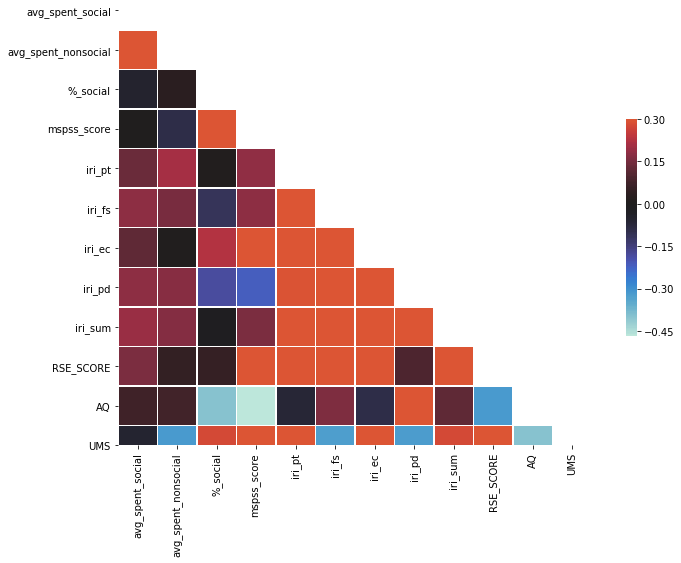

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig = plt.figure(figsize=(12, 8))
sns.heatmap(cormat, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
# social support // avgspent on social --> old data only

In [41]:
oldwtpdata = wtpdata.iloc[17:48,:]
print(oldwtpdata)

   participant  avg_spent_social  avg_spent_nonsocial  %_social  mspss_score  \
17        wtp1          0.030000             0.028000  0.791667       6.2500   
18        wtp2          0.025000             0.026522  0.530612       5.9166   
19        wtp3          0.017000             0.020370  0.448980       6.1667   
20        wtp4          0.027000             0.023333  0.693878       5.6660   
21        wtp5          0.030000             0.025000  0.836735       7.0000   
22        wtp6          0.031000             0.033333  0.816327       6.7500   
23        wtp7          0.032000             0.030625  0.346939       3.7500   
24        wtp8          0.025000             0.022500  0.591837       4.9160   
25        wtp9          0.025000             0.021739  0.510638       2.8330   
26       wtp10          0.026000             0.020000  0.680851       5.8330   
27       wtp11          0.025000             0.016250  0.673469       6.5000   
28       wtp12          0.026000        

In [42]:
old_avgsoc= oldwtpdata['avg_spent_social']
old_avgnonsoc= oldwtpdata['avg_spent_nonsocial']
old_mspss = oldwtpdata['mspss_score']
old_aq = oldwtpdata['AQ']
old_prop = oldwtpdata['%_social']


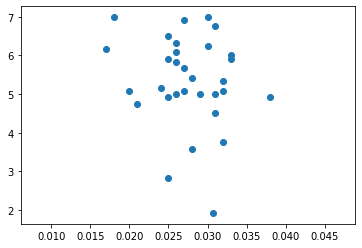

[[ 2.13260751e-05 -9.95323353e-04]
 [-9.95323353e-04  1.38128413e+00]]
Pearsons correlation: -0.183
p value: 0.3234


In [43]:
pyplot.scatter(old_avgsoc, old_mspss) 
pyplot.show()
covariance = cov(old_avgsoc, old_mspss)
print(covariance)
corr, _ = pearsonr(old_avgsoc, old_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(old_avgsoc, old_mspss)
print('p value: %.4f' % p)

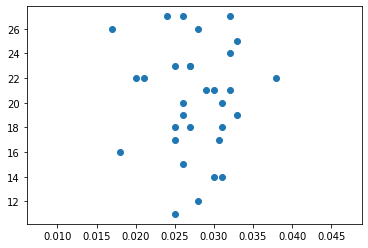

[[ 2.13260751e-05 -2.15176344e-04]
 [-2.15176344e-04  1.96645161e+01]]
Pearsons correlation: -0.011
p value: 0.9553


In [44]:
# social // aq
pyplot.scatter(old_avgsoc, old_aq)
pyplot.show()
covariance = cov(old_avgsoc, old_aq)
print(covariance)
corr, _ = pearsonr(old_avgsoc, old_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(old_avgsoc, old_aq)
print('p value: %.4f' % p)

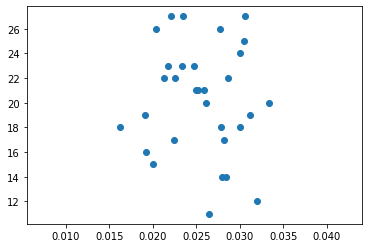

[[ 1.88699784e-05 -1.34084946e-03]
 [-1.34084946e-03  1.96645161e+01]]
Pearsons correlation: -0.070
p value: 0.7098


In [45]:
# nonsocial // aq
pyplot.scatter(old_avgnonsoc, old_aq)
pyplot.show()
covariance = cov(old_avgnonsoc, old_aq)
print(covariance)
corr, _ = pearsonr(old_avgnonsoc, old_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(old_avgnonsoc, old_aq)
print('p value: %.4f' % p)

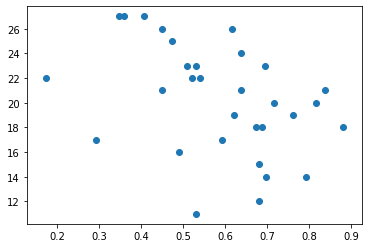

[[ 0.02780575 -0.2998055 ]
 [-0.2998055  19.66451613]]
Pearsons correlation: -0.405
p value: 0.0236


In [46]:
pyplot.scatter(old_prop, old_aq) 
pyplot.show()
covariance = cov(old_prop, old_aq)
print(covariance)
corr, _ = pearsonr(old_prop, old_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(old_prop, old_aq)
print('p value: %.4f' % p)

In [ ]:
## new pilot data only

In [141]:
new_wtp = wtpdata.iloc[0:17,:]
print(new_wtp)

                  participant  avg_spent_social  avg_spent_nonsocial  \
0    5ea3310bf9c4f828f0c909c5          0.030244             0.029000   
1    5eeaff28cf5da71d691ef212          0.026000             0.028780   
2    5ee1bc2e2be5f61f0eaf1713          0.027308             0.028000   
3   ﻿5cfecc1e96681500168a1799          0.038333             0.037037   
4    5ff362e8c9707d8ff6020080          0.028800             0.026800   
5   ﻿5e76742575ad9c0506e721bb          0.031667             0.029091   
6    ﻿5ef76ff7d195c248bfe2511          0.031795             0.030833   
7   ﻿5f7e4fbc36d39211c80599fe          0.035263             0.027813   
8   ﻿5f8dd51f6d2378145bf99cdc          0.035000             0.029063   
9   ﻿5f12b3a2791d172281e7d6a9          0.028621             0.024545   
10  ﻿5ff0a56b116bbf440e520992          0.037692             0.029600   
11  ﻿566c9284d408ea000519c6d7          0.018889             0.017500   
12  ﻿5f2dc46d6fa1250ee8a1a15d          0.035333             0.03

In [142]:
n = len(new_wtp)
print(n)

17


In [143]:
socialavg= new_wtp.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print(social_M)

0.03247303622893432


In [144]:
nonsocialavg = new_wtp.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences

nonsocial_M = mean(nonsocialavg)
print(nonsocial_M)

0.029998790608651814


In [145]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0002469190734217005 0.0420621755448026
0.002987964606136788


In [146]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0007246878633358263


In [147]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

16


In [148]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=4.829, df=16, cv=1.746, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


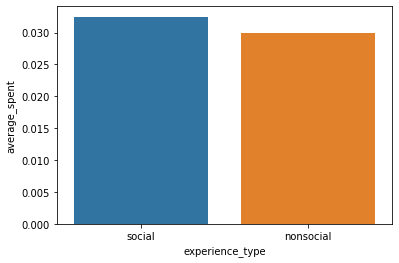

In [149]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [150]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.4321680459622661


In [162]:
new_avgsoc= new_wtp['avg_spent_social']
new_avgnonsoc= new_wtp['avg_spent_nonsocial']
new_mspss = new_wtp['mspss_score']
new_aq = new_wtp['AQ']
new_prop = new_wtp['%_social']
new_iri_sum = new_wtp['iri_sum']
new_sn = new_wtp['SNS']
new_ums = new_wtp['UMS']

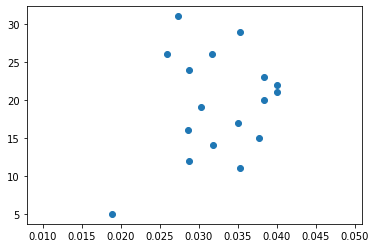

[[3.33691159e-05 9.14013463e-03]
 [9.14013463e-03 4.72647059e+01]]
Pearsons correlation: 0.230
p value: 0.3742
Accept null hypothesis that the means are equal.


In [152]:
# avg spent on social // AQ scores 
pyplot.scatter(new_avgsoc, new_aq)
pyplot.show()
covariance = cov(new_avgsoc, new_aq)
print(covariance)
corr, _ = pearsonr(new_avgsoc, new_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_avgsoc, new_aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

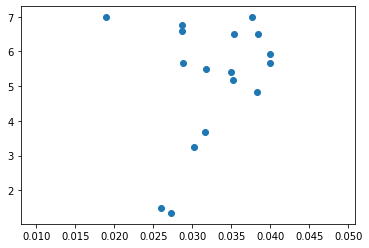

[[3.33691159e-05 2.49837658e-03]
 [2.49837658e-03 3.13694853e+00]]
Pearsons correlation: 0.244
p value: 0.3449
Accept null hypothesis that the means are equal.


In [153]:
pyplot.scatter(new_avgsoc, new_mspss)
pyplot.show()
covariance = cov(new_avgsoc, new_mspss)
print(covariance)
corr, _ = pearsonr(new_avgsoc, new_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_avgsoc, new_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

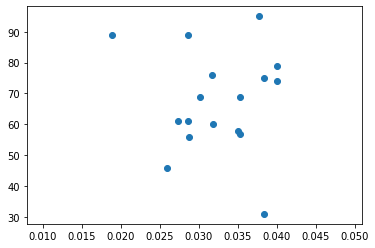

[[ 3.33691159e-05 -4.90262264e-03]
 [-4.90262264e-03  2.65992647e+02]]
Pearsons correlation: -0.052
p value: 0.8428
Accept null hypothesis that the means are equal.


In [154]:
pyplot.scatter(new_avgsoc, new_ums)
pyplot.show()
covariance = cov(new_avgsoc, new_ums)
print(covariance)
corr, _ = pearsonr(new_avgsoc, new_ums)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_avgsoc, new_ums)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

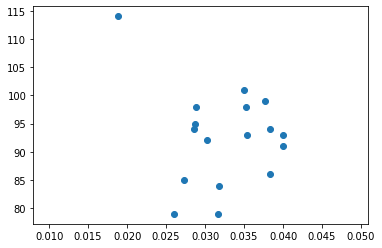

[[ 3.33691159e-05 -9.25776715e-03]
 [-9.25776715e-03  7.41176471e+01]]
Pearsons correlation: -0.186
p value: 0.4744
Accept null hypothesis that the means are equal.


In [167]:
pyplot.scatter(new_avgsoc, new_sn)
pyplot.show()
covariance = cov(new_avgsoc, new_sn)
print(covariance)
corr, _ = pearsonr(new_avgsoc, new_sn)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_avgsoc, new_sn)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

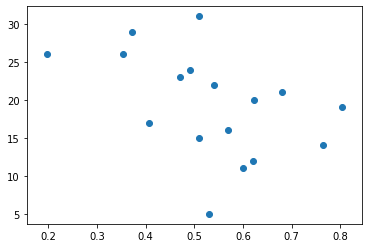

[[ 2.27699299e-02 -4.72798544e-01]
 [-4.72798544e-01  4.72647059e+01]]
Pearsons correlation: -0.456
p value: 0.0660
Reject the null hypothesis that the means are equal.


In [155]:
## proportion of chosen social// AQ scores
pyplot.scatter(new_prop, new_aq) 
pyplot.show()
covariance = cov(new_prop, new_aq)
print(covariance)
corr, _ = pearsonr(new_prop, new_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_prop, new_aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

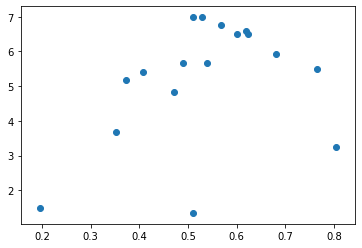

[[0.02276993 0.09839015]
 [0.09839015 3.13694853]]
Pearsons correlation: 0.368
p value: 0.1460
Accept null hypothesis that the means are equal.


In [156]:
## proportion of chosen social// MSPSS scores
pyplot.scatter(new_prop, new_mspss) 
pyplot.show()
covariance = cov(new_prop, new_mspss)
print(covariance)
corr, _ = pearsonr(new_prop, new_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_prop, new_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

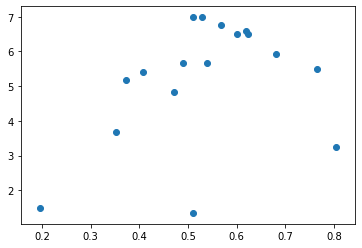

[[0.02276993 0.09839015]
 [0.09839015 3.13694853]]
Pearsons correlation: 0.368
p value: 0.1460
Accept null hypothesis that the means are equal.


In [157]:
pyplot.scatter(new_prop, new_mspss) 
pyplot.show()
covariance = cov(new_prop, new_mspss)
print(covariance)
corr, _ = pearsonr(new_prop, new_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_prop, new_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

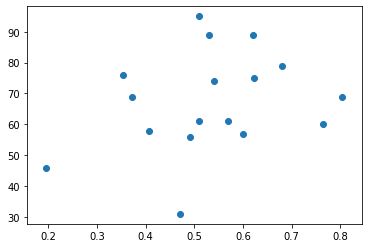

[[2.27699299e-02 6.79788426e-01]
 [6.79788426e-01 2.65992647e+02]]
Pearsons correlation: 0.276
p value: 0.2832
Accept null hypothesis that the means are equal.


In [158]:
pyplot.scatter(new_prop, new_ums) 
pyplot.show()
covariance = cov(new_prop, new_ums)
print(covariance)
corr, _ = pearsonr(new_prop, new_ums)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_prop, new_ums)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

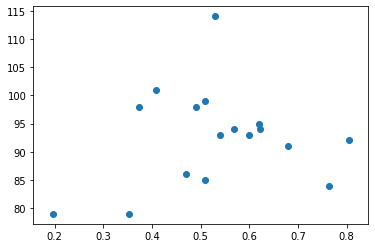

[[2.27699299e-02 2.04232982e-01]
 [2.04232982e-01 7.41176471e+01]]
Pearsons correlation: 0.157
p value: 0.5468
Accept null hypothesis that the means are equal.


In [163]:
pyplot.scatter(new_prop, new_sn) 
pyplot.show()
covariance = cov(new_prop, new_sn)
print(covariance)
corr, _ = pearsonr(new_prop, new_sn)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(new_prop, new_sn)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [164]:
import pandas as pd

cormat = new_wtp.corr()
print(cormat)

                     avg_spent_social  avg_spent_nonsocial  %_social  \
avg_spent_social             1.000000             0.863952  0.147266   
avg_spent_nonsocial          0.863952             1.000000  0.155657   
%_social                     0.147266             0.155657  1.000000   
mspss_score                  0.244192            -0.015256  0.368143   
iri_pt                      -0.092656            -0.289866 -0.010463   
iri_fs                      -0.526410            -0.293884 -0.017911   
iri_ec                      -0.195824            -0.430074  0.280473   
iri_pd                      -0.127113             0.038709 -0.331375   
iri_sum                     -0.301120            -0.363260 -0.053724   
RSE_SCORE                   -0.004688            -0.225774  0.281395   
AQ                           0.230150             0.292279 -0.455750   
SNS                         -0.186154            -0.426914  0.157211   
UMS                         -0.052038            -0.314139  0.27

In [165]:
import numpy as np

def triang(cormat, triang='lower'):
    
    if triang == 'upper':
        rstri = pd.DataFrame(np.triu(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,1:]
        rstri.drop(rstri.tail(1).index, inplace=True)
        
    if triang == 'lower':
        rstri = pd.DataFrame(np.tril(cormat.values),
                             index=cormat.index,
                             columns=cormat.columns).round(3)
        rstri = rstri.iloc[:,:-1]
        rstri.drop(rstri.head(1).index, inplace=True) 
 
    rstri.replace(to_replace=[0,1], value='', inplace=True)
    
    return(rstri)

triang(cormat, triang='upper')

,avg_spent_nonsocial,%_social,mspss_score,iri_pt,iri_fs,iri_ec,iri_pd,iri_sum,RSE_SCORE,AQ,SNS,UMS
avg_spent_social,0.864,0.147,0.244,-0.093,-0.526,-0.196,-0.127,-0.301,-0.005,0.23,-0.186,-0.052
avg_spent_nonsocial,,0.156,-0.015,-0.29,-0.294,-0.43,0.039,-0.363,-0.226,0.292,-0.427,-0.314
%_social,,,0.368,-0.01,-0.018,0.28,-0.331,-0.054,0.281,-0.456,0.157,0.276
mspss_score,,,,0.317,-0.023,0.3,-0.595,-0.065,0.754,-0.705,0.667,0.449
iri_pt,,,,,-0.08,0.719,-0.127,0.677,0.476,-0.25,0.212,0.585
iri_fs,,,,,,-0.009,0.37,0.35,-0.158,-0.161,-0.19,-0.322
iri_ec,,,,,,,-0.114,0.727,0.455,-0.263,0.352,0.561
iri_pd,,,,,,,,0.526,-0.589,0.73,-0.57,-0.320
iri_sum,,,,,,,,,0.057,0.154,-0.095,0.279
RSE_SCORE,,,,,,,,,,-0.601,0.684,0.790


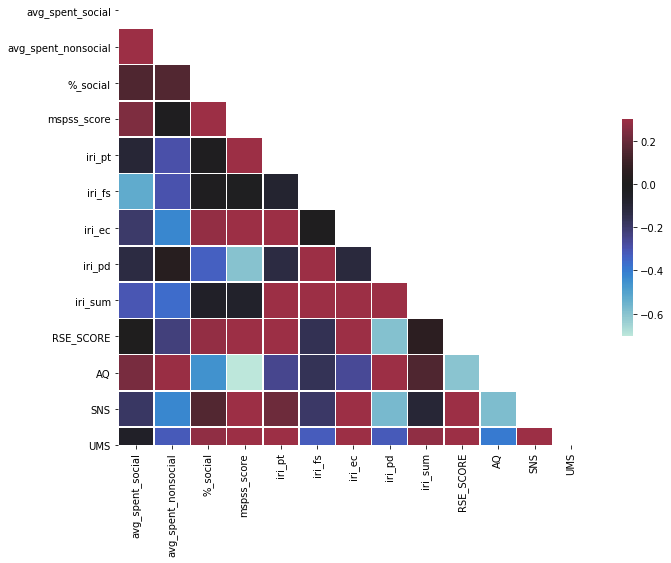

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


fig = plt.figure(figsize=(12, 8))
sns.heatmap(cormat, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})